# MARKET SEGMENT PREDICTION USING DECISION TREE
##### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

###### Loading the Dataset

In [3]:
df =pd.read_csv("C:/Users/Vignesh Arjun/Desktop/Customer Data.csv")
df

NameError: name 'pd' is not defined

### EDA

In [2]:
df.shape

NameError: name 'df' is not defined

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


#### MISSING VALUE TREATMENT

In [6]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
df['MINIMUM_PAYMENTS'] =df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df['CREDIT_LIMIT'] =df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df.duplicated().sum()

0

###### Dropping the Customer ID since it acts as an index value of the dataset.

In [10]:
df.drop(['CUST_ID'],axis=1,inplace=True)

In [11]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### Visualization

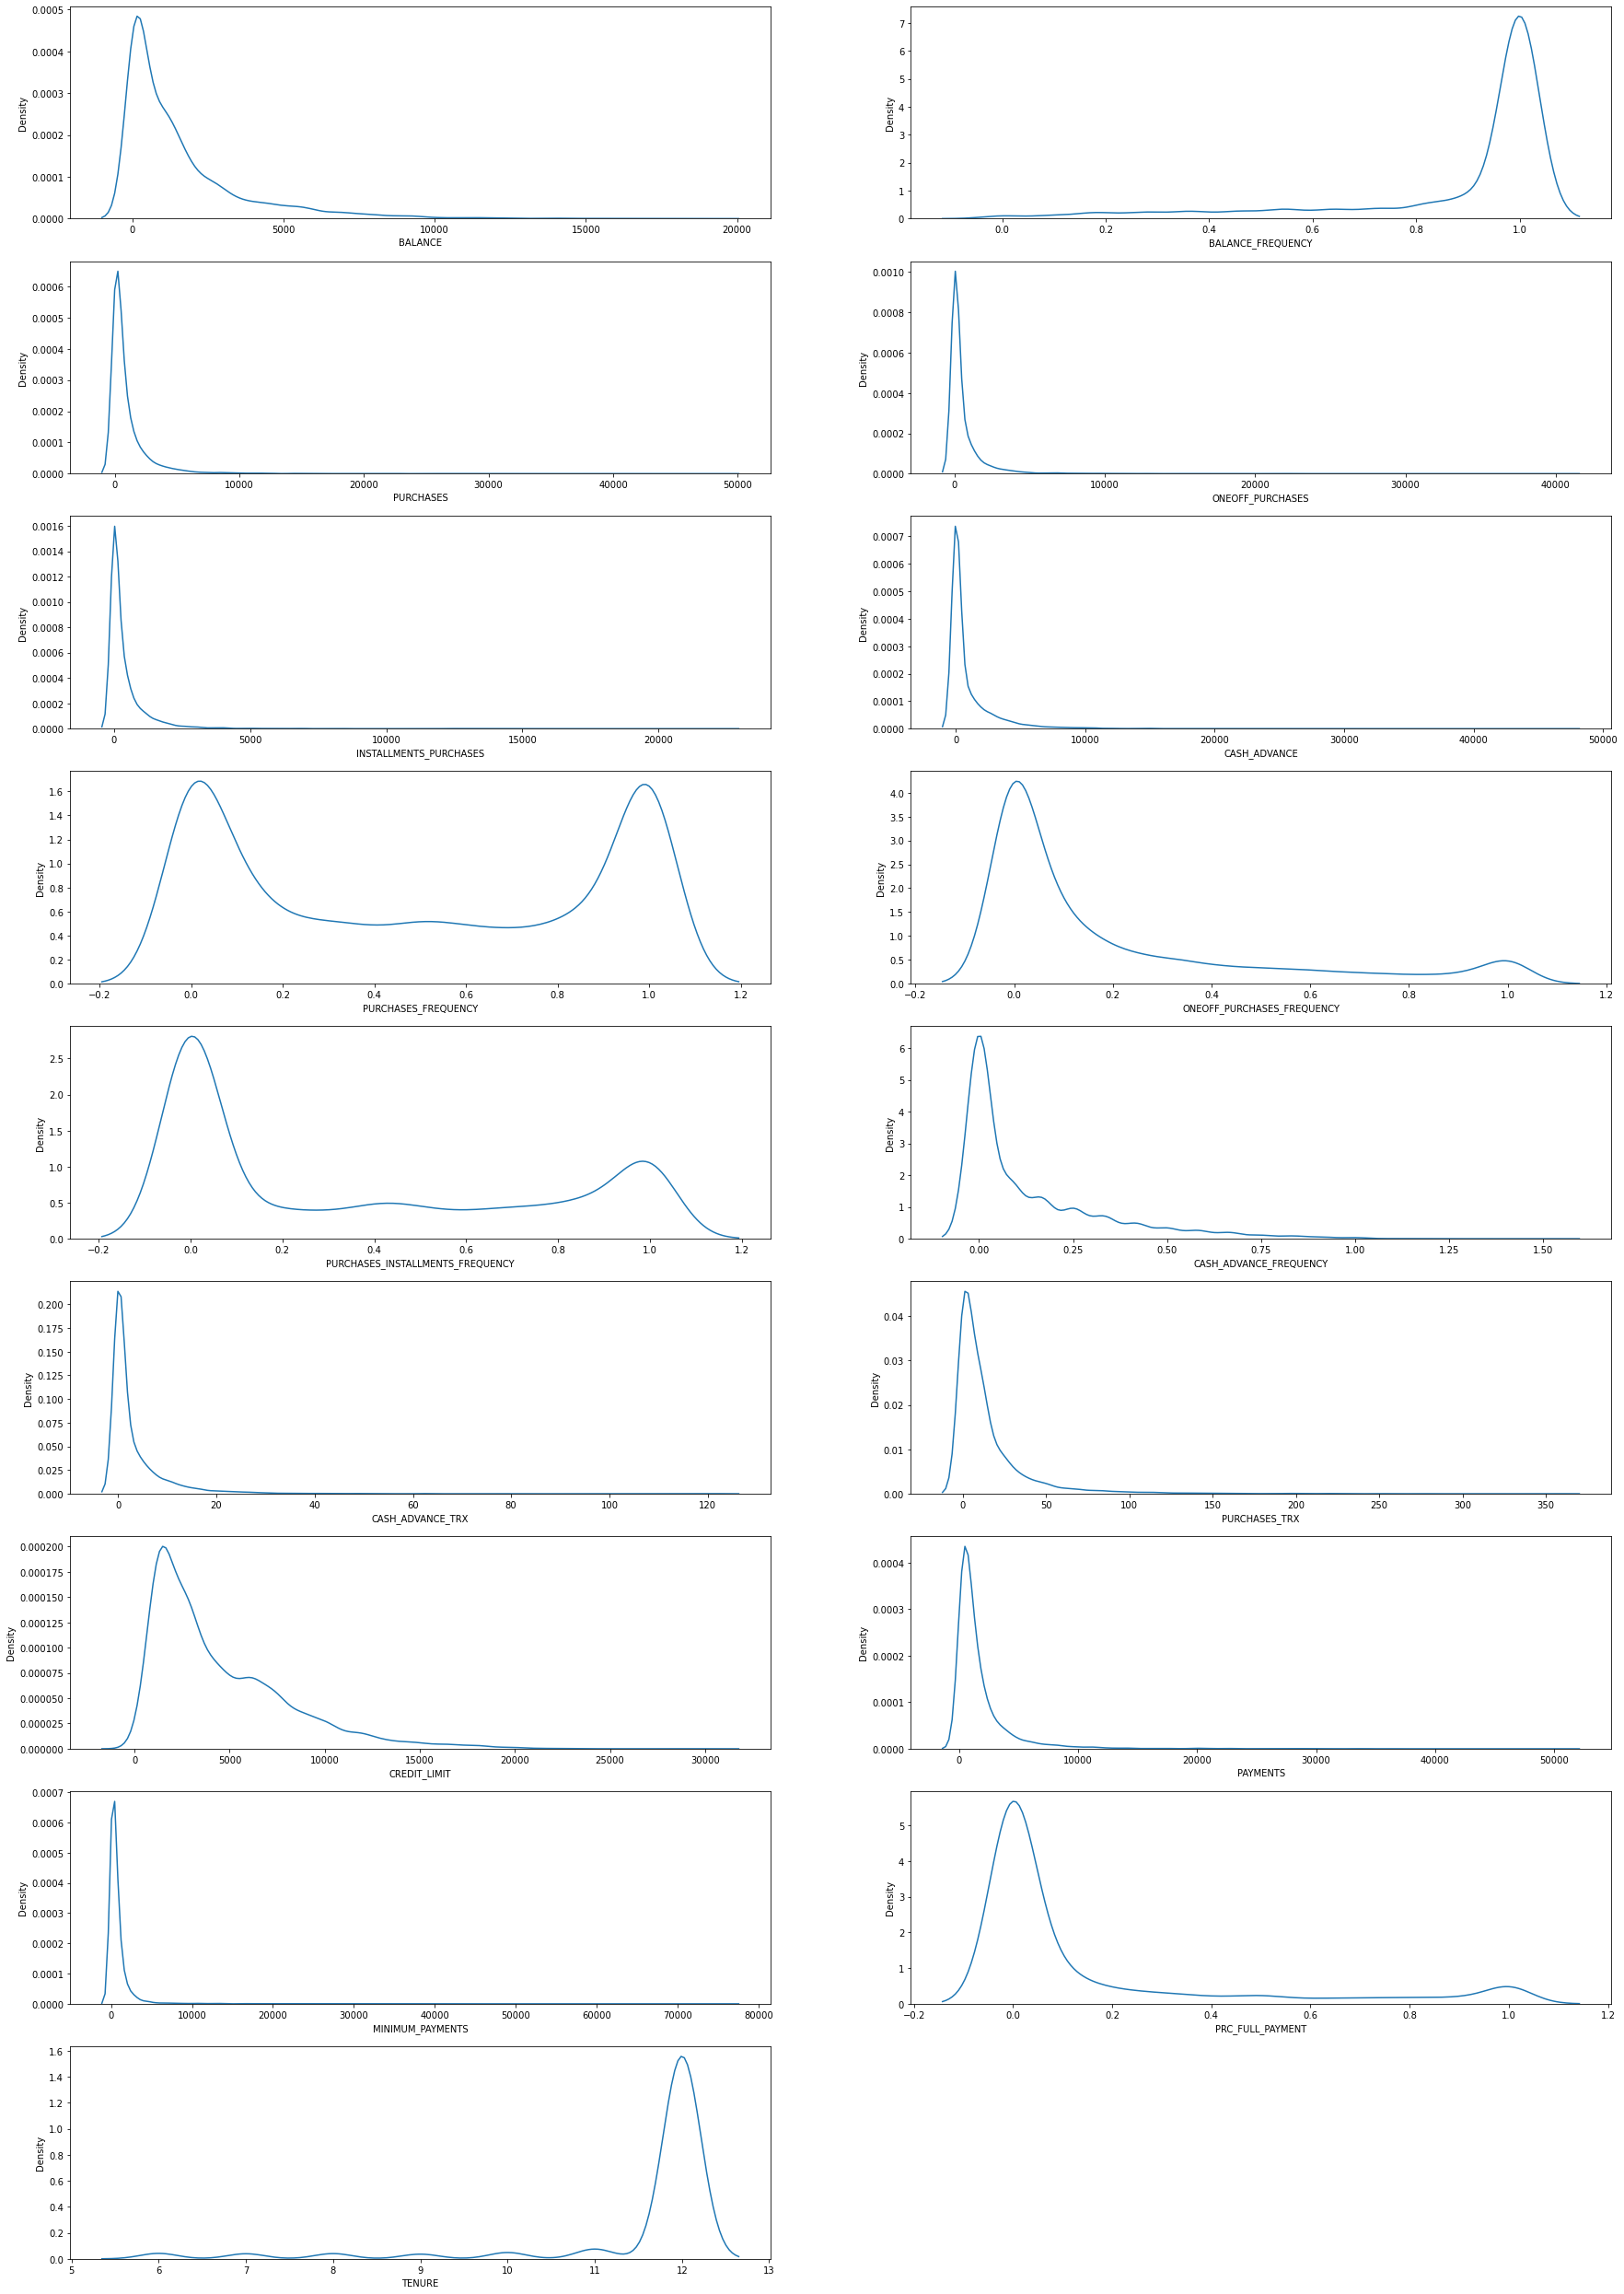

In [12]:
plt.figure(figsize=(30,45))
for i,col in enumerate(df.columns):
   if df[col].dtype!='object':
       ax = plt.subplot(9,2,i+1)
       sns.kdeplot(df[col],ax=ax)
       plt.xlabel(col)

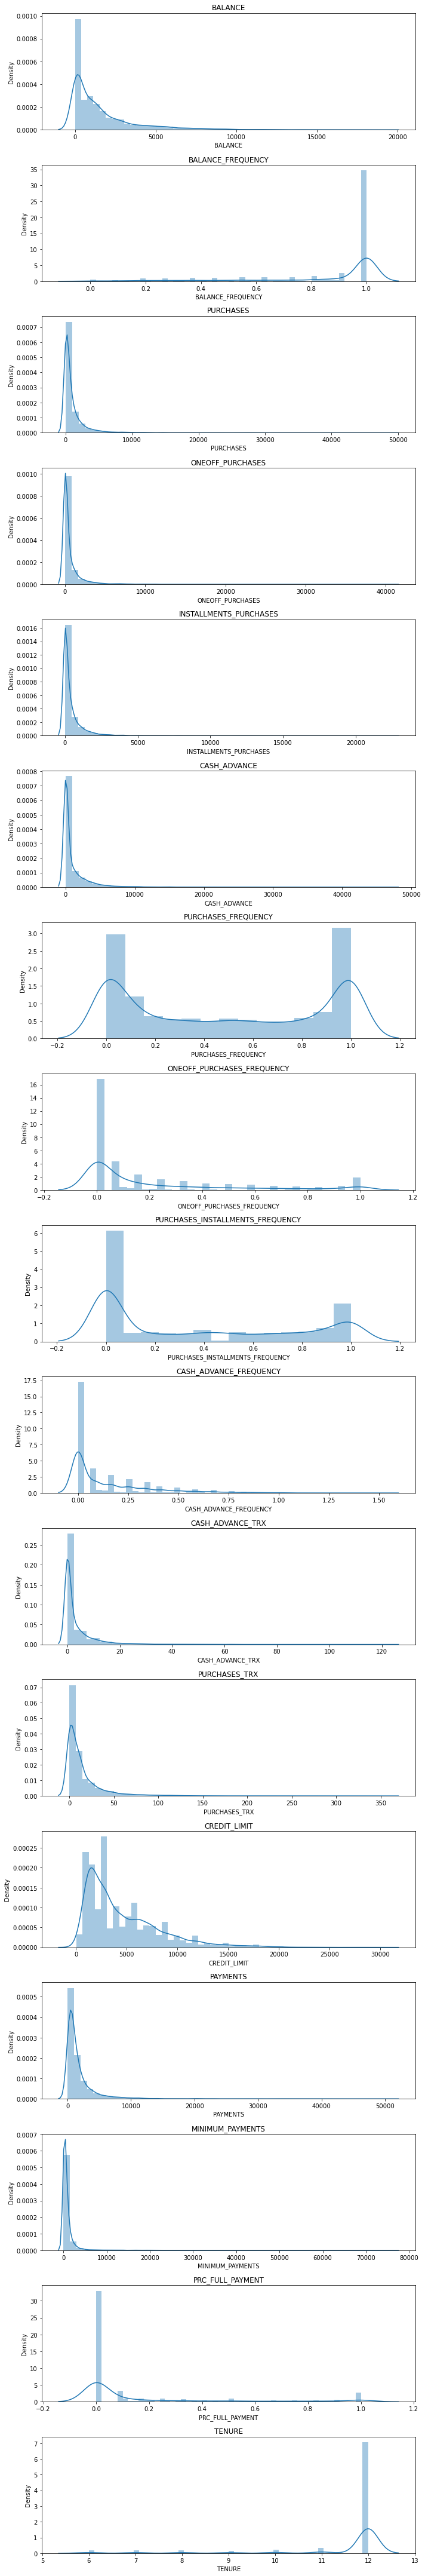

In [13]:
plt.figure(figsize=(10,60))
for i in range(0,17):
    plt.subplot(17,1,i+1)
    sns.distplot(df[df.columns[i]])
    plt.title(df.columns[i])
plt.tight_layout()

#### MULTICOLLINEARITY

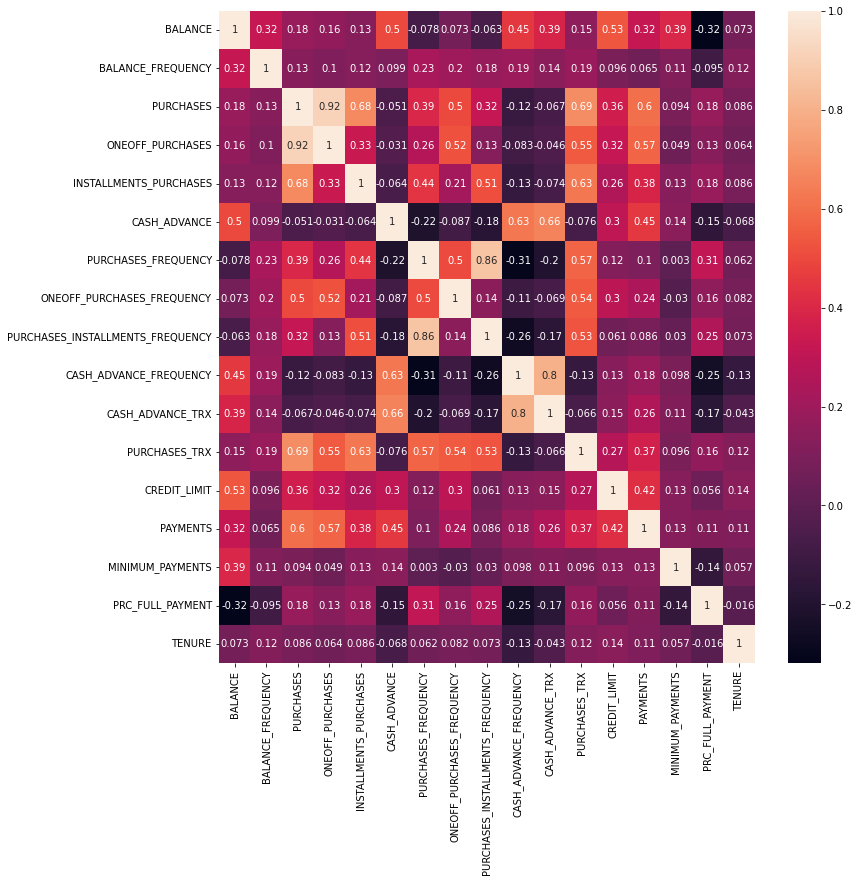

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

###### Scaling the data before implementing PCA

In [15]:
scalar =StandardScaler()
scaled_df = scalar.fit_transform(df)

##### Finding the value of the k

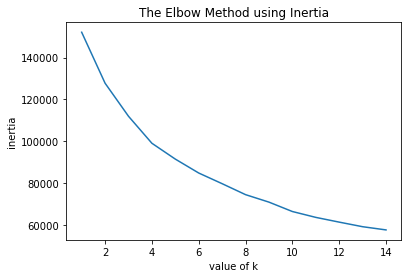

In [16]:
inertia =[]
range_val =range(1,15)
for i in range_val:
    kmean =KMeans(n_clusters =i)
    kmean.fit_predict(pd.DataFrame(scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia)
plt.xlabel('value of k')
plt.ylabel('inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#### Applying PCA to the dataset to get a transformed dataset with k number of variables, we get:

In [17]:
pca =PCA(n_components=2)
principal_components =pca.fit_transform(scaled_df)
pca_df=pd.DataFrame(data=principal_components,columns=['PCA1','PCA2'])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076454
1,-1.138295,2.506469
2,0.969688,-0.383557
3,-0.873628,0.043157
4,-1.599434,-0.688582
...,...,...
8945,-0.359630,-2.016137
8946,-0.564371,-1.639117
8947,-0.926205,-1.810777
8948,-2.336554,-0.657950


### Using Kmeans model to predict the scaled dataset

In [18]:
kmeans_model =KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans=pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

###### Plotting the values so that we can get the outputs plotted using scatterplot, we arrive getting:

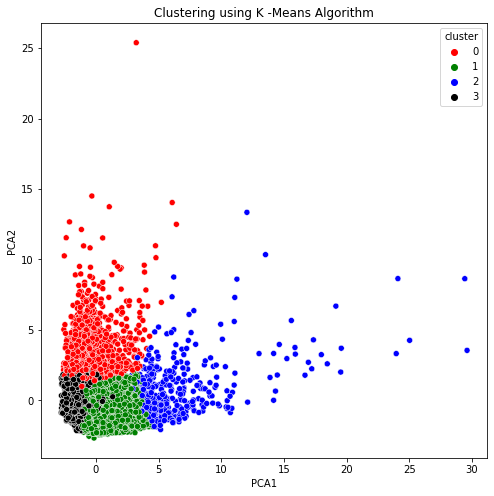

In [19]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='PCA1',y='PCA2',hue='cluster',data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title('Clustering using K -Means Algorithm')
plt.show()

In [20]:
cluster_centers =pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.449581,0.384851,-0.238731,-0.167907,-0.256089,1.672017,-0.512840,-0.219532,-0.456031,1.735946,1.605079,-0.288018,0.829410,0.595307,0.485800,-0.406235,-0.099019
1,-0.321439,0.243323,0.109302,0.001139,0.256124,-0.366313,0.984230,0.317745,0.874392,-0.462472,-0.360235,0.297250,-0.077263,-0.138297,-0.091707,0.394901,0.057564
2,0.956884,0.462829,3.125289,2.715577,2.400884,-0.139334,1.136663,1.800787,1.067218,-0.309808,-0.157980,3.001253,1.433772,1.923476,0.477523,0.453007,0.324229
3,-0.268951,-0.371997,-0.343104,-0.230546,-0.387511,-0.185429,-0.796396,-0.388920,-0.713329,-0.105699,-0.168211,-0.474766,-0.336093,-0.263414,-0.119953,-0.257978,-0.052150


#### Concatenating the actual data and the data arrived using clustering:

In [21]:
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


###### Splitting the clusters depending  upon the hue we applied on the scatterplot by assigning them to four different variables

In [22]:
cluster_1_df =cluster_df[cluster_df['Cluster']==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,0
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,0
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,0
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,0
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,0
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,0
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,0


In [23]:
cluster_2_df =cluster_df[cluster_df['Cluster']==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,1
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,1
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,1
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,1
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.00,6,1


In [24]:
cluster_3_df =cluster_df[cluster_df['Cluster']==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,2
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,2
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,2
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,2
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,2
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,2
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,2


In [25]:
cluster_4_df =cluster_df[cluster_df['Cluster']==3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,3
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,3
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,3
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,3
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,3
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,3


###### Using Countplot to visualize the total number of values we got on each cluster

<AxesSubplot:xlabel='Cluster', ylabel='count'>

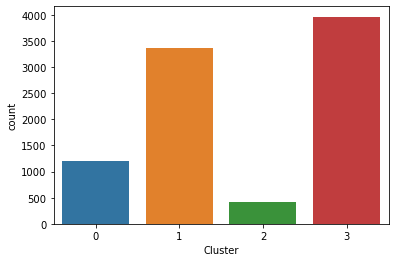

In [26]:
sns.countplot(x='Cluster',data=cluster_df)

#### Dropping the cluster column to arrive at the final dataset used to train and test the data:

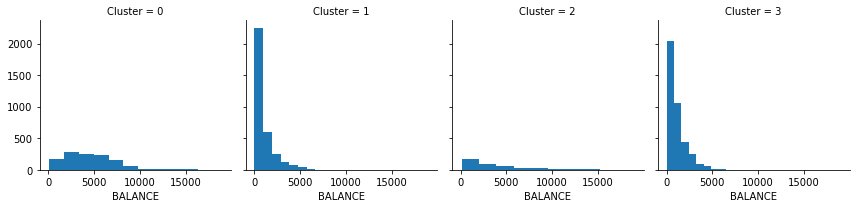

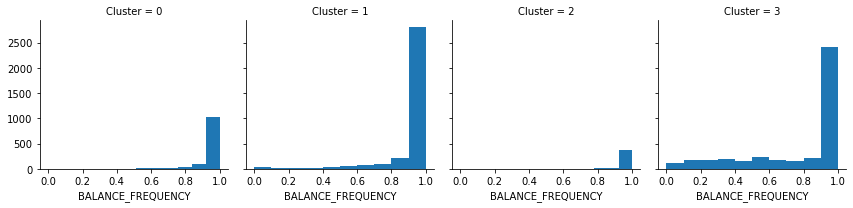

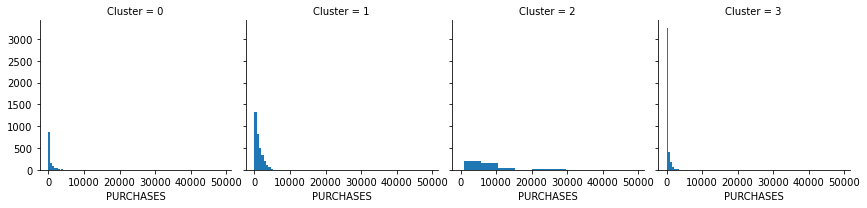

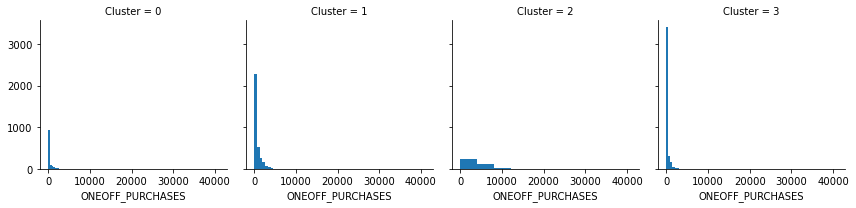

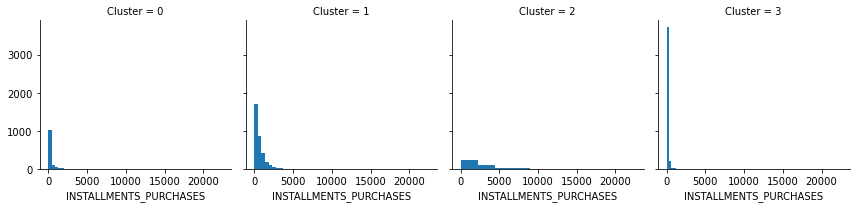

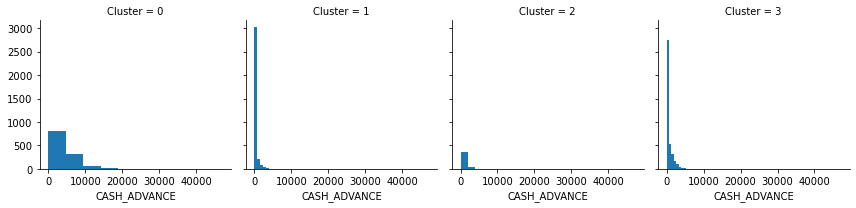

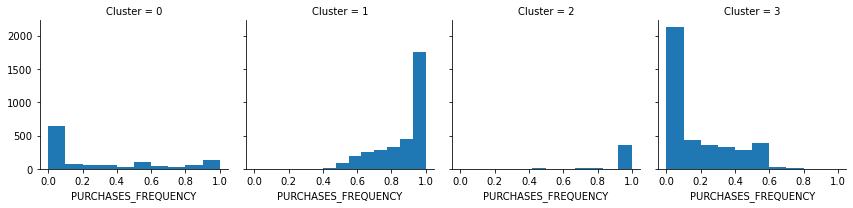

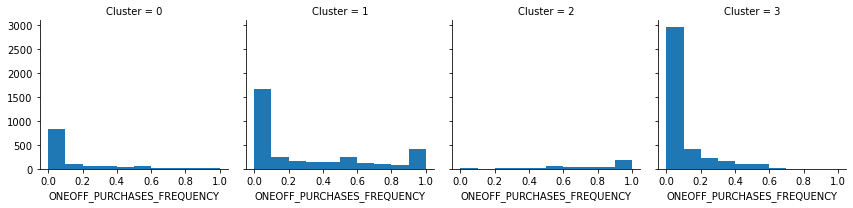

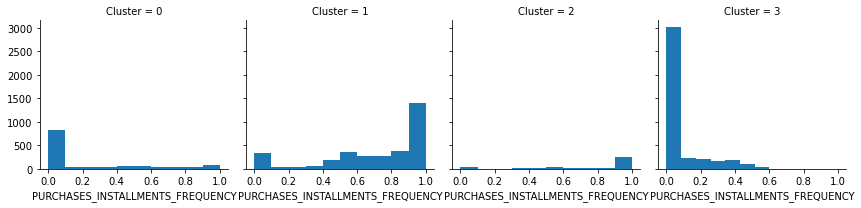

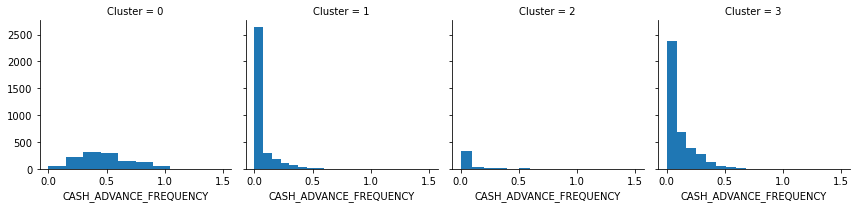

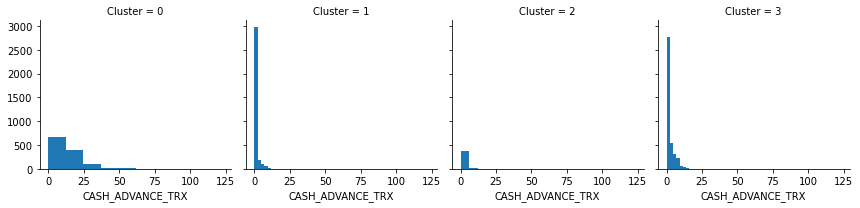

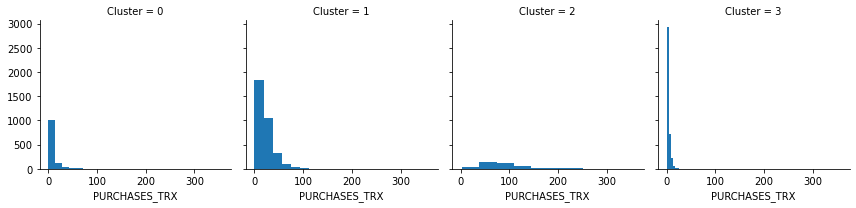

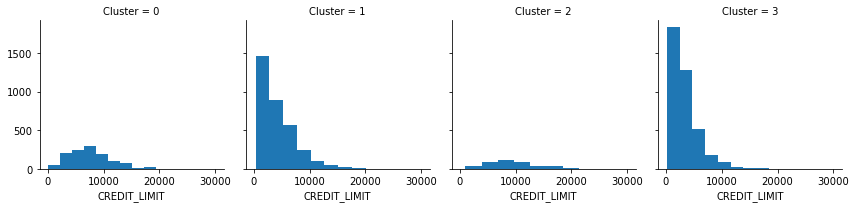

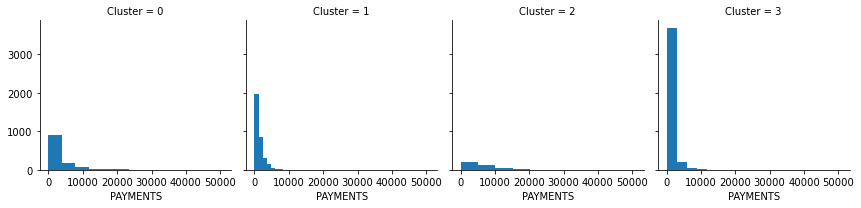

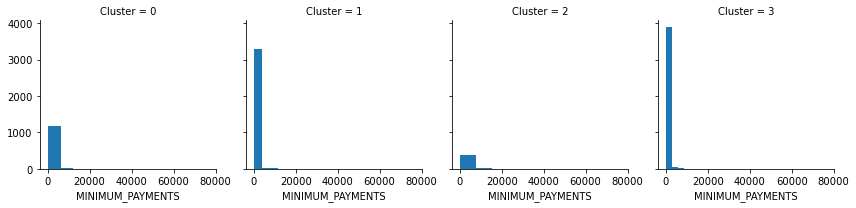

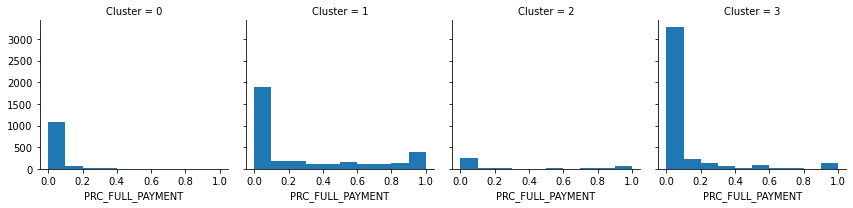

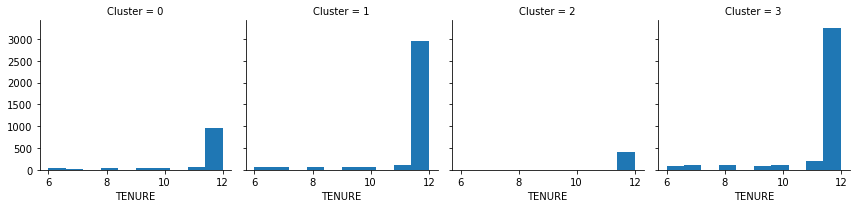

In [27]:
for c in cluster_df.drop(['Cluster'],axis=1):
    grid =sns.FacetGrid(cluster_df,col='Cluster')
    grid =grid.map(plt.hist,c)
plt.show() 

### TRAIN_TEST_SPLIT

In [28]:
X =cluster_df.drop(['Cluster'],axis=1)
y = cluster_df[['Cluster']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=11)

In [39]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6858,4338.877278,0.888889,0.00,0.00,0.00,5705.426498,0.000000,0.000000,0.000000,0.444444,19,0,6000.0,217.059511,10057.561920,0.000000,9
1156,76.059828,1.000000,927.10,927.10,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,1500.0,906.712652,163.265372,1.000000,12
7820,84.442485,1.000000,1515.73,837.57,678.16,0.000000,0.916667,0.416667,0.500000,0.000000,0,17,2000.0,1421.806435,138.105996,1.000000,12
215,2.433254,0.181818,36.00,0.00,36.00,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,7500.0,0.000000,864.206542,0.000000,12
6120,2043.788380,1.000000,0.00,0.00,0.00,5997.514998,0.000000,0.000000,0.000000,0.500000,9,0,6500.0,8075.826793,495.373116,0.250000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1293,3950.987900,1.000000,699.44,699.44,0.00,444.077396,1.000000,1.000000,0.000000,0.166667,3,13,4000.0,994.405792,1817.698864,0.000000,12
4023,73.876478,1.000000,600.00,0.00,600.00,0.000000,0.666667,0.000000,0.666667,0.000000,0,12,3000.0,574.321262,165.586015,1.000000,12
7259,2271.102591,1.000000,272.93,0.00,272.93,1120.449630,0.583333,0.000000,0.583333,0.083333,2,14,2500.0,764.791793,988.662899,0.000000,12
5200,87.887472,1.000000,1282.73,0.00,1282.73,0.000000,0.916667,0.000000,0.916667,0.000000,0,11,3500.0,1347.512780,177.102986,0.818182,12


In [30]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4061,1676.218891,1.000000,0.00,0.00,0.00,774.229185,0.000000,0.000000,0.000000,0.416667,8,0,1800.0,477.308046,487.840515,0.000000,12
2642,3490.855736,1.000000,1039.48,1039.48,0.00,4200.991254,0.083333,0.083333,0.000000,0.250000,10,3,9000.0,1091.424125,1048.661408,0.000000,12
7727,65.915182,0.727273,840.00,0.00,840.00,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1000.0,1014.023858,185.815051,0.857143,12
5768,3144.690403,1.000000,865.94,865.94,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,4,3500.0,1018.210531,977.712784,0.000000,12
2708,2878.528369,1.000000,0.00,0.00,0.00,1563.518213,0.000000,0.000000,0.000000,0.250000,4,0,3000.0,653.306123,897.546490,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,869.702973,1.000000,370.74,138.54,232.20,710.440728,0.916667,0.166667,0.666667,0.416667,15,11,1000.0,540.848608,215.056881,0.000000,12
7715,134.299115,0.909091,1059.18,0.00,1059.18,0.000000,0.833333,0.000000,0.833333,0.000000,0,10,4000.0,1201.538972,159.033099,0.727273,12
1215,2.549291,0.181818,322.98,322.98,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,9500.0,1210.429773,5.458904,0.000000,12
7033,1522.680962,1.000000,0.00,0.00,0.00,272.151183,0.000000,0.000000,0.000000,0.083333,3,0,6500.0,592.120457,374.842938,0.000000,12


In [31]:
model =DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
y_pred =model.predict(X_test)

In [32]:
print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[260  12   4  21]
 [  6 808   5  23]
 [  4  11  85   2]
 [ 15  24   0 958]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       297
           1       0.95      0.96      0.95       842
           2       0.90      0.83      0.87       102
           3       0.95      0.96      0.96       997

    accuracy                           0.94      2238
   macro avg       0.93      0.91      0.92      2238
weighted avg       0.94      0.94      0.94      2238



In [33]:
model.score(X_test,y_test)

0.9432529043789097